### Polynomial Chaos Expansion example: Oakley Function  (1 random input, scalar output)

Authors: Katiana Kontolati, Dimitrios Loukrezis \
Date: May 6, 2021

In this example, PCE is used to generate a surrogate model of a sinusoidal function with a single random input and a scalar output.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from UQpy.Distributions import Normal
from UQpy.Surrogates.PCE.PCE import PolyChaosExp
from UQpy.Surrogates.PCE.PolyBasis import construct_td_basis
from UQpy.Surrogates.PCE.CoefficientFit import fit_lstsq, fit_lasso, fit_ridge
from UQpy.Surrogates.PCE.MomentEstimation import pce_mean, pce_variance


Define the sinusoidal function to be approximated.

Reference: Oakley, J. E., & O'Hagan, A. (2004). Probabilistic sensitivity analysis of complex models: a Bayesian approach. Journal of the Royal Statistical Society: Series B (Statistical Methodology), 66(3), 751-769.

In [2]:
def oakley_function(x):                                
    return 5 + x + np.cos(x)

Create a distribution object, generate samples and evaluate the function at the samples.

In [3]:
np.random.seed(1)

dist = Normal(loc=0, scale=2)   
n_samples = 100         
x = dist.rvs(n_samples)  
y = oakley_function(x)  

Create an object from the PCE class, construct a total-degree polynomial basis given a maximum polynomial degree, and compute the PCE coefficients using least squares regression.

In [4]:
max_degree = 8
pce_lstsq = PolyChaosExp(dist)
construct_td_basis(pce_lstsq, max_degree)
fit_lstsq(pce_lstsq, x, y)

Create an object from the PCE class, construct a total-degree polynomial basis given a maximum polynomial degree, and compute the PCE coefficients using LASSO regression.

In [5]:
pce_lasso = PolyChaosExp(dist)
construct_td_basis(pce_lasso, max_degree)
fit_lasso(pce_lasso, x, y)

Create an object from the PCE class, construct a total-degree polynomial basis given a maximum polynomial degree, and compute the PCE coefficients using ridge regression.

In [6]:
pce_ridge = PolyChaosExp(dist)
construct_td_basis(pce_ridge, max_degree)
fit_ridge(pce_ridge, x, y)

PCE surrogate is used to predict the behavior of the function at new samples.

In [7]:
x_test = dist.rvs(100)
x_test.sort(axis=0) 

y_test_lstsq = pce_lstsq.predict(x_test)
y_test_lasso = pce_lasso.predict(x_test)
y_test_ridge = pce_ridge.predict(x_test)

Plot training data, true function and PCE surrogate

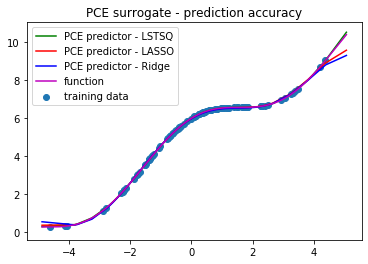

In [8]:
n_samples_ = 1000
x_ = np.linspace(min(x_test), max(x_test), n_samples_)
f = oakley_function(x_)

plt.figure()
plt.plot(x_test, y_test_lstsq, 'g', label='PCE predictor - LSTSQ')
plt.plot(x_test, y_test_lasso, 'r', label='PCE predictor - LASSO')
plt.plot(x_test, y_test_ridge, 'b', label='PCE predictor - Ridge')
plt.scatter(x, y, label='training data')
plt.plot(x_, f, 'm', label='function')
plt.title('PCE surrogate - prediction accuracy')
plt.legend(); plt.show()

### Error Estimation

Construct a validation dataset and get the validation error.

In [9]:
# validation sample
n_samples = 100000
x_val = dist.rvs(n_samples)
y_val = oakley_function(x_val).flatten()

# PCE predictions
y_pce_lstsq = pce_lstsq.predict(x_val).flatten()
y_pce_lasso = pce_lasso.predict(x_val).flatten()
y_pce_ridge = pce_ridge.predict(x_val).flatten()

# mean absolute errors
error_lstsq = np.sum(np.abs(y_val - y_pce_lstsq))/n_samples
error_lasso = np.sum(np.abs(y_val - y_pce_lasso))/n_samples
error_ridge = np.sum(np.abs(y_val - y_pce_ridge))/n_samples

print('Mean absolute error from least squares regression is: ', error_lstsq)
print('Mean absolute error from LASSO regression is: ', error_lasso)
print('Mean absolute error from ridge regression is: ', error_ridge)
print(' ')

# mean relative errors
error_lstsq = np.sum( np.abs((y_val - y_pce_lstsq)/y_val) )/n_samples
error_lasso = np.sum( np.abs((y_val - y_pce_lasso)/y_val) )/n_samples
error_ridge = np.sum( np.abs((y_val - y_pce_ridge)/y_val) )/n_samples

print('Mean relative error from least squares regression is: ', error_lstsq)
print('Mean relative error from LASSO regression is: ', error_lasso)
print('Mean relative error from ridge regression is: ', error_ridge)


Mean absolute error from least squares regression is:  0.03217754924280261
Mean absolute error from LASSO regression is:  0.04291817795897923
Mean absolute error from ridge regression is:  0.05770880458789686
 
Mean relative error from least squares regression is:  0.09155215604942117
Mean relative error from LASSO regression is:  0.03806924174646646
Mean relative error from ridge regression is:  0.04584157138058663


### Moment Estimation

Returns mean and variance of the PCE surrogate.

In [10]:
n_mc = 1000000
x_mc = dist.rvs(n_mc)  
y_mc = oakley_function(x_mc)  
mean_mc = np.mean(y_mc)
var_mc = np.var(y_mc)

print('Moments from least squares regression :', pce_mean(pce_lstsq), pce_variance(pce_lstsq))
print('Moments from LASSO regression :', pce_mean(pce_lasso), pce_variance(pce_lasso))
print('Moments from Ridge regression :', pce_mean(pce_ridge), pce_variance(pce_ridge))
print('Moments from Monte Carlo integration: ', mean_mc, var_mc)

Moments from least squares regression : [5.16682459] [6.5958041]
Moments from LASSO regression : [5.10958812] [4.36536531]
Moments from Ridge regression : [5.09887226] [4.27814028]
Moments from Monte Carlo integration:  5.136420440487339 4.4693295039275736
